In [2]:
# 导入相关模块
import sklearn.datasets as skdata
import matplotlib.pyplot as plt
# 画图
import seaborn as sns
import pandas as pd
import numpy as np
# 导入模型
# 交叉验证
from sklearn.model_selection import cross_val_score
# 决策树
from sklearn.tree import DecisionTreeRegressor
# 导入图
from sklearn.tree import export_graphviz
import graphviz
# 划分数据集
import sklearn.model_selection as skmodel
# 选择线性模型
import sklearn.linear_model as sklinear
# 特征处理，标准化
import sklearn.preprocessing as skprep
# 性能度量
import sklearn.metrics as skmetrics

In [3]:
# 获取数据
# data.data为特征，data.targe为目标
data = skdata.load_boston()

In [4]:
# 转化为dataframe
df = pd.DataFrame(data['data'], columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT'])
df = df[['CRIM','INDUS','NOX','RM','AGE','DIS','TAX','PTRATIO','B','LSTAT']]
df

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98
1,0.02731,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14
2,0.02729,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03
3,0.03237,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94
4,0.06905,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,69.1,2.4786,273.0,21.0,391.99,9.67
502,0.04527,11.93,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,9.08
503,0.06076,11.93,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,5.64
504,0.10959,11.93,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,6.48


In [5]:
df['PRICE'] = data.target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   INDUS    506 non-null    float64
 2   NOX      506 non-null    float64
 3   RM       506 non-null    float64
 4   AGE      506 non-null    float64
 5   DIS      506 non-null    float64
 6   TAX      506 non-null    float64
 7   PTRATIO  506 non-null    float64
 8   B        506 non-null    float64
 9   LSTAT    506 non-null    float64
 10  PRICE    506 non-null    float64
dtypes: float64(11)
memory usage: 43.6 KB


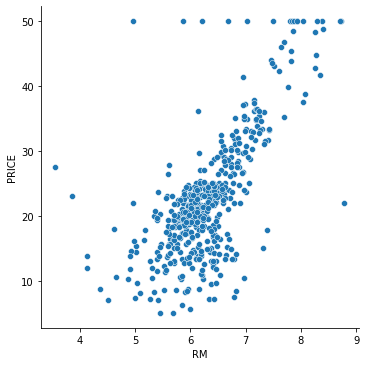

In [6]:
# 绘制散点图，初步探索数据间关系
sns.relplot(x='RM', y='PRICE', data=df)

In [7]:
# 划分数据集和训练集
x_train, x_test, y_train, y_test = skmodel.train_test_split(data.data, data.target, random_state=22)

In [8]:
# 划分数据集和训练集
# x_train, x_test, y_train, y_test = skmodel.train_test_split(df.drop(columns = 'PRICE'), df['PRICE'], random_state=22)

In [9]:
# 特征工程,划分到同一区间(-1~1)
transfer = skprep.StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.fit_transform(x_test)

In [10]:
# 决策树模型
regressor = DecisionTreeRegressor() #实例化
# 传入完整数据,自动划分和循环
# 默认返回R平方,越接近1越好,有正有负
cross_val_score(regressor, data.data, data.target, cv=10)

array([ 0.52260295,  0.63872982, -1.43571267,  0.0638494 ,  0.67916997,
        0.52650071,  0.26143597,  0.37308273, -2.04844428, -0.36175243])

In [11]:
# 使用负均方误差,去掉负号就是均方误差
# cross_score = cross_val_score(regressor, data.data, data.target, cv=10,scoring = "neg_mean_squared_error")

In [12]:
cross_score = cross_val_score(regressor, df.drop(columns = 'PRICE'), df['PRICE'], cv=10,scoring = "neg_mean_squared_error")
cross_score

array([-22.96019608, -11.02078431, -16.2045098 , -90.68470588,
       -17.2445098 , -45.27039216, -11.777     , -94.2458    ,
       -66.1034    , -35.9782    ])

In [13]:
# 求个平均
cross_score.mean()

-41.148949803921575

In [14]:
regressor2 = DecisionTreeRegressor()

In [15]:
regressor2.fit(x_train, y_train)

DecisionTreeRegressor()

In [16]:
y_predict = regressor2.predict(x_test)
y_predict2 = regressor2.predict(x_train)

In [19]:
score = regressor2.score(x_test, y_test)
score2 = regressor2.score(x_train, y_train)
score

1.0

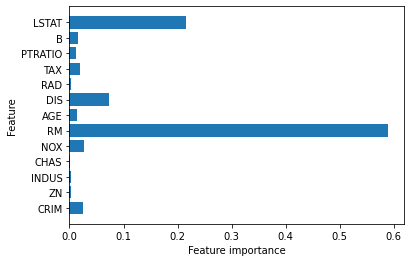

In [18]:
def plot_feature_importances(model, data):
    n_features = data.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
 
    plt.show()
 
plot_feature_importances(regressor2, data)